# Selfmodulated laser wakefield accelerator

1D simulation of a laser self-modulated wakefield accelerator.

In [16]:
import em1d
import numpy

# Time step
dt = 0.019

# Simulation time
tmax = 100.

# Number of cells
nx  = 4000

# Simulation box size
box = 80.0


## Background plasma

# Particles per cell
ppc = 10

# Use a step density profile
electrons = em1d.Species( "electrons", -1.0, ppc,
                           density = em1d.Density( type = "step", start = 100.0))

# Initialize simulation
sim = em1d.Simulation( nx, box, dt, species = electrons )

# Add laser pulse 1
sim.add_laser( em1d.Laser( start = 77.0, rise = 2.0, flat = 30.0, fall = 30.0, a0 = 0.5, omega0 = 10.0, 
                          polarization = numpy.pi/2 ))

# Add laser pulse 2
sim.add_laser( em1d.Laser( start = 77.0, rise = 2.0, flat = 30.0, fall = 30.0, a0 = 0.025, omega0 = 11.0, 
                          polarization = numpy.pi/2 ))

# Add laser pulse 3
sim.add_laser( em1d.Laser( start = 77.0, rise = 2.0, flat = 30.0, fall = 3.0,a0 = 0.025, omega0 = 9.0, 
                          polarization = numpy.pi/2 ))


# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( em1d.Smooth(xtype = "compensated", xlevel = 4) )

# Run the simulation

sim.run( 1 )


Running simulation up to t = 1 ...
n = 53, t = 1.007
Done.


## Longitudinal Electric field and Plasma Density

In [13]:
sim.run( 300 )


Running simulation up to t = 300 ...
n = 15790, t = 300.011
Done.


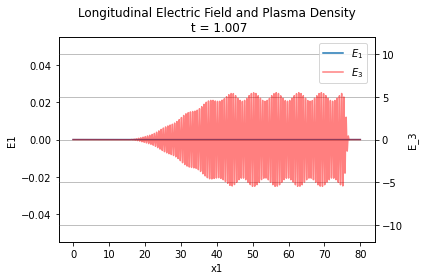

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plot values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

ax1.plot(numpy.linspace(xmin, xmax, num = sim.nx), sim.emf.Ex, label = "$E_1$" )
ax1.set_xlabel("x1")
ax1.set_ylabel("E1")

#ax2 = ax1.twinx()
#ax2.plot(numpy.linspace(xmin, xmax, num = sim.nx), numpy.abs(electrons.charge()),'r', label = "$|n|$" , alpha = 0.8)
#ax2.set_ylabel("|$n$|")
#ax2.set_ylim(0.5,1.5)

ax3 = ax1.twinx()
ax3.plot(numpy.linspace(xmin, xmax, num = sim.nx), sim.emf.Ez, 'r',label = "$E_3$" , alpha = 0.5)
ax3.set_ylabel("E_3")
ax3.set_ylim(-12,12)

plt.title("Longitudinal Electric Field and Plasma Density\n t = {:g}".format(sim.t))
plt.grid(True)

fig.legend(loc = (0.75,0.70))
fig.tight_layout()

plt.show()

## x1 - u1 Phasespace

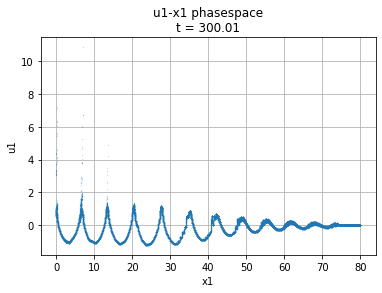

In [15]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx

plt.plot(x(electrons),  electrons.particles['ux'],  '.', ms = 0.2)
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()